# Assignment 2:  Ephemeris of Earth

Numerically integrate the Earth’s orbit around the sun. Use the initial conditions from
https://ssd.jpl.nasa.gov/horizons.cgi#top- with ephemeris type “vectors”, target body “earth”,
and coordinate origin sun. 

Explicitly define your code verification variables; calculate them as
well, and try to integrate for a million years (I think this is feasible both with computing time and
with precision- but if it is not go as long as you can with the computing power you have
available). Plot the eccentricity of the orbit and the time of perihelion and aphelion over that
period.

In developing your model and doing your calculations, it is useful to do everything in terms of vectors (and use built in functions for vector operations instead of dealing with individual components).


(i) Integrate the Earth's orbit.

Analyse system from center of mass frame:

$$m_S {\bf{r_S}} + m_E + {\bf{r_E}} = 0,$$
$$ m_S {\bf{v_S}} + m_E {\bf{v_E}} = 0,$$

where $m_S$ and $m_E$ are the masses of the Sun and the Earth, respectively, and ${\bf{r_S}}$ and ${\bf{r_E}}$ are the position vectors with respect to the center of mass of the two-body system; the velocities are ${\bf{v_S}}$ and ${\bf{v_E}}$.

The position vector pointing from the Sun to the Earth and the corresponding spead of the Earth relative to the Sun are:

$${\bf{r}} = {\bf{r_E}} - {\bf{r_S}},$$
$${\bf{v}} = {\bf{v_E}} - {\bf{v_S}},$$

which imply that

$${\bf{r_E}} = \frac{m_S}{m_S + m_E} {\bf{r}},$$
$${\bf{v_E}} = \frac{m_S}{m_S + m_E} {\bf{v}}.$$

The gravitational force experience by the Earth from the Sun's graviational field is:

$${\bf{F_g}} = m_E {\bf{a}} = - G \frac{m_S m_E}{r^3} {\bf{r}},$$

which in terms of the Earth's position and velocity vectors with respect to the center of mass is:

$$\frac{d{\bf{v_E}}}{dt} = {\bf{a_E}} = (\frac{m_S}{m_S + m_E})^3 G \frac{m_S}{{r_E}^3} {\bf{r_E}}.$$

We have, then, the following coupled differential equations:

$\frac{d{\bf{v_E}}}{dt} = (\frac{m_S}{m_S + m_E})^3 G \frac{m_S}{{r_E}^3} {\bf{r_E}},$

$\frac{d{\bf{r_E}}}{dt} = {\bf{v_E}},$

or

$\begin{pmatrix}
\frac{dv_{x_E}}{dt} \\
\frac{dv_{y_E}}{dt} \\
\frac{dv_{z_E}}{dt} \\
\frac{dx_E}{dt} \\
\frac{dy_E}{dt} \\
\frac{dz_E}{dt}
\end{pmatrix} \quad= \begin{pmatrix}
(\frac{m_S}{m_S + m_E})^3 G \frac{m_S}{({{x_E}^2 + {y_E}^2 + {z_E}^2})^{3/2}} x_E \\
(\frac{m_S}{m_S + m_E})^3 G \frac{m_S}{({{x_E}^2 + {y_E}^2 + {z_E}^2})^{3/2}} y_E \\
(\frac{m_S}{m_S + m_E})^3 G \frac{m_S}{({{x_E}^2 + {y_E}^2 + {z_E}^2})^{3/2}} z_E \\
v_{x_E} \\
v_{y_E} \\
v_{z_E} \end{pmatrix}.$

In the code, I will abbreviate the factor $(\frac{m_S}{m_S + m_E})^3 G \frac{m_S}{({{x_E}^2 + {y_E}^2 + {z_E}^2})^{3/2}}$ as "$\frac{fac}{{r_E}^3}$".

The initial values (for a month of September) used to solve this system of coupled differential equations are:

${\bf{r}} = \begin{pmatrix}
9.847117163998849 \times 10^{-01} \\ 
1.773932191154630 \times 10^{-01} \\ 
-1.157150325239339 \times 10^{-05} \end{pmatrix} AU \; \; (1 AU = 1.496 \times 10^{11} \; meters),$

${\bf{v}} = \begin{pmatrix}
-3.337326534214962 \times 10^{-03} \\
1.686857386238172 \times 10^{-02} \\
-2.042273364066464 \times 10^{-07} \end{pmatrix} AU/day \; \; (1 day = 86400 \; seconds).$

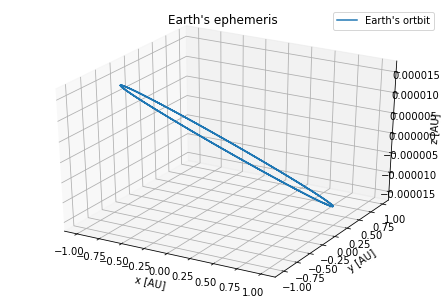

In [7]:
import numpy as np
from scipy.integrate import odeint

#------------------------------------------------------------------------------
# Variables.
G = 6.67430 * 10**-11;    # Newtonian constant of gravitation (from NIST).
mS = 1988500 * 10**24;    # Mass of the Sun (from NASA).
mE = 5.9724 * 10**24;     # Mass of the Earth (from NASA).

fac = (mS / (mS + mE))**3 * G * mS;


#------------------------------------------------------------------------------
# Set up system of coupled differential equations.
def sys(C0, time):
                          # C0 = [xE0, yE0, zE0, vxE0, vyE0, vzE0] contains
                          # the initial conditions for the position and 
                          # velocity vector of the Earth with respect to the
                          # center of mass.
                          # time = time over which one integrates using
                          # odeint.
    # Initial values for
     # position:
    RE = [C0[0], C0[1], C0[2]];
     # velocity:
    VE = [C0[3], C0[4], C0[5]];
    
    # Earth's radial position from Sun-Earth system center of mass.
    rE = (C0[0]**2 + C0[1]**2 + C0[2]**2)**(1/2)
    
    # Coupled differential equations.
    dVEdt = [];
    for i in range(0, len(RE)):
        dVEdt.append(-(fac / rE**3) * RE[i])
    
    dREdt = VE;
    
    return dREdt + dVEdt

#------------------------------------------------------------------------------
# Prepare time array and initial conditions.
    
# Create time array.
t = 3 * 365 * 86400               # 3 years in seconds.
time = np.linspace(0, t, 1000);

# Vectors with initial values.
RE0 = [9.847117163998849 * 1.496 * 10**10, 1.773932191154630 * 1.496 * 10**10, -1.157150325239339 * 1.496 * 10**6];
                                    # Iinitial position vector in meters.

VE0 = [-3.337326534214962 * (1.496 / 86400) * 10**8, 1.686857386238172 * (1.496 / 86400) * 10**9, -2.042273364066464 * (1.496 / 86400) * 10**4];
                                    # Initial velocity vector in meters per second.

# Summarized:
C0 = RE0 + VE0;

#------------------------------------------------------------------------------
# Integrate for one year; solve the system of coupled differential equations.
sol = odeint(sys, C0, time)
RE = [];                                            # Eath's position vector relative to the
                                                    # Sun-Earth system center of mass in meters.
for i in range(0, 3):
    RE.append(sol[:, i])
    
VE = [];                                            # Earth's velocity vector relative to the
                                                    # Sun-Earth system center of mass in meters/second.
for i in range(3, 6):
    VE.append(sol[:, i])
#------------------------------------------------------------------------------
# Plot.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(RE[0] / (1.496 * 10**11), RE[1] / (1.496 * 10**11), RE[2] / (1.496 * 10**11), label = "Earth's ortbit")   # Plot in AU.
plt.legend()

# Annotate.
plt.title("Earth's ephemeris")
ax.set_xlabel('x [AU]')
ax.set_ylabel('y [AU]')
ax.set_zlabel('z [AU]')

plt.show()

(ii) Verification of the code.

(1) Conservation of energy:

Kinetic energy:

$$T = T_E + T_S = \frac{1}{2} m_E {\bf{v_E}}^2 + \frac{1}{2} m_S {\bf{v_S}}^2.$$

Potential energy:

$$U = - G \frac{m_S m_E}{r} = - G \frac{m_E (m_S + m_E)}{r_E}.$$

Total energy:

$$E = T + U = constant.$$

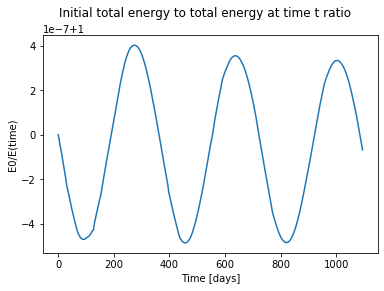

In [8]:
# (1) Conservation of energy.

# Calculate the total energy.

#------------------------------------------------------------------------------
# Kinetic energy.

# Define variable for the Sun.
RS = [];
VS = [];
RS0 = [];
VS0 = [];
for i in range(0, len(RE)):
    RS.append(- (mE / mS) * RE[i])
    VS.append(- (mE / mS) * VE[i])
    RS0.append(- (mE / mS) * RE0[i])
    VS0.append(- (mE / mS) * VE0[i])

# Final energy:
T_Earth = [];
T_Sun = [];
for i in range(0, len(time)):
    # Earth:
    TdummyE = ((1 / 2) * mE * (VE[0][i]**2 + VE[1][i]**2 + VE[2][i]**2));       # Kinetic energy.
    T_Earth.append(TdummyE)

    # Sun:
    TdummyS = ((1 / 2) * mE * (VS[0][i]**2 + VS[1][i]**2 + VS[2][i]**2));      # Kinetic energy.
    T_Sun.append(TdummyS)

# Initial energy:
T0_Earth = (1 / 2) * mE * ((VE0[0]**2 + VE0[1]**2 + VE0[2]**2))
T0_Sun = (1 / 2) * mE * ((VS0[0]**2 + VS0[1]**2 + VS0[2]**2))  

#------------------------------------------------------------------------------
# Potential energy.

# Final energy:
U = [];
for i in range(0, len(time)):
    Udummy = - (G * (mE * (mS + mE))) / (RE[0][i]**2 + RE[1][i]**2 + RE[2][i]**2)**(1/2);        
                                                                             # Potential energy.
    U.append(Udummy)

# Initial energy:
U0 = - (G * (mE * (mS + mE))) / (RE0[0]**2 + RE0[1]**2 + RE0[2]**2)**(1/2);

#------------------------------------------------------------------------------
# Total energy.

# Final:
E_total = [];
for i in range(0, len(time)):
    E_total.append(T_Earth[i] + T_Sun[i] + U[i])
    
# Initial:
E0_total = T0_Earth + T0_Sun + U0;

# Energy ratio:
ratio_E = [];
for i in range(0, len(E_total)):
    ratio_E.append(E0_total / E_total[i])

#------------------------------------------------------------------------------
# Plot.

plt.plot(time / 86400, ratio_E)

# Annotate.
plt.suptitle('Initial total energy to total energy at time t ratio')
plt.xlabel('Time [days]')
plt.ylabel('E0/E(time)')

plt.show()

(2) Conservation of angular momentum momentum.

Momentum:

$$L = L_E + L_S = {\bf{r_E}} \times m_E {\bf{v_E}} + {\bf{r_S}} \times m_S {\bf{v_S}} = constant.$$

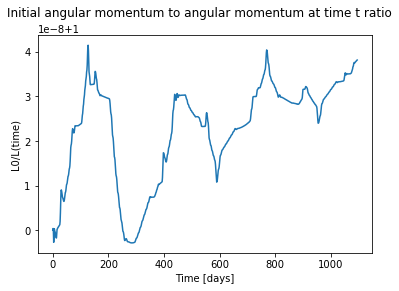

In [9]:
# (2) Conservation of angular momentum.

# Calculate the total angular momentum.

L_Earth = [];
L_Sun = []
for i in range(0, len(time)):
    # Earth:
    REdummy = [RE[0][i], RE[1][i], RE[2][i]];                  # Position vector.
    PEdummy = [mE * VE[0][i], mE * VE[1][i], mE * VE[2][i]];   # Linear momentum.
    L_Earth.append(np.cross(REdummy, PEdummy))
    
    # Sun:
    RSdummy = [RS[0][i], RS[1][i], RS[2][i]];                  # Position vector.
    PSdummy = [mS * VS[0][i], mS * VS[1][i], mS * VS[2][i]];   # Linear momentum.
    L_Sun.append(np.cross(RSdummy, PSdummy))

#------------------------------------------------------------------------------
# Total angular momentum (magnitudes).

# Final:
L_total = [];
for i in range(0, len(time)):
    L_total_dummy = (L_Earth[i] + L_Sun[i])
    L_total.append(np.linalg.norm(L_total_dummy))

# Initial:
PE0 = [];
PS0 = [];
for i in range(0, 3):
    # Earth:
    PE0.append(mE * VE0[i])
    
    # Sun:
    PS0.append(mS * VS0[i])

L0_Earth_vector = np.cross(RE0, PE0)
L0_Sun_vector = np.cross(RS0, PS0)

L0_total_vector = [];
for i in range(0, 3):
    L0_total_vector.append(L0_Earth_vector[i] + L0_Sun_vector[i])

L0_total = np.linalg.norm(L0_total_vector)

#------------------------------------------------------------------------------
# Ratio in angular momenta.
ratio_L = [];
for i in range(0, len(time)):
    ratio_L.append(L0_total/L_total[i])

#------------------------------------------------------------------------------
# Plot.
    
plt.plot(time / 86400, ratio_L)

plt.suptitle('Initial angular momentum to angular momentum at time t ratio')
plt.xlabel('Time [days]')
plt.ylabel('L0/L(time)')

plt.show()

(iii) Eccentricity of the orbit.

The eccentricity is given by (from Wikipedia: orbital eccentricity):

$$e = \sqrt{1 + \frac{2 \epsilon h^2}{{\mu}^2}},$$

where $\epsilon$ is the specific orbital energy (total energy divided by the reduced mass), $\mu = G (m_S + m_E)$ is the standard gravitational parameter based on the total mass of the Sun-Earth system, and $h$ is the specific relative angular momentum (angular momentum of the Sun-Earth system fivided by the reduced mass).

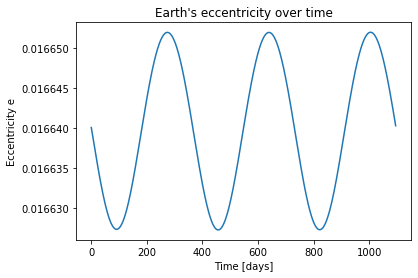

In [5]:
# Determine the eccentricity of the orbit of the Earth.

# Final:
epsilon = np.divide(E_total, ((mS * mE) / (mS + mE)));
h = np.divide(L_total, ((mS * mE) / (mS + mE)));
mu = G * (mS + mE);
e = np.sqrt(1 + ((2 * epsilon * h**2) / (mu**2)));           # Eccentricity.

#------------------------------------------------------------------------------
# Plot.

plt.plot(time / 86400, e)

# Annotate.
plt.title("Earth's eccentricity over time")
plt.xlabel('Time [days]')
plt.ylabel('Eccentricity e')

plt.show()

(iv) Perihelion and Aphelion times.

The perihelion is the minimum separation between the Earth and the Sun. The Aphelon is the maximum separation between the Earth and the Sun.

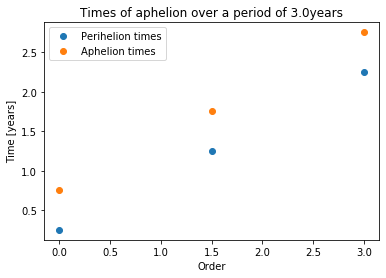

Perihelion and aphelion happening in years from initial time in October 2019
          Perihelion          ||            Aphelion
Distance [AU] IN Time [years] || Distance [AU] IN Time [years]
     0.983    IN    0.249     ||      1.017    IN    0.751
     0.983    IN    1.249     ||      1.017    IN    1.751
     0.983    IN    2.252     ||      1.017    IN    2.754


In [6]:
# Find extrema of r, the distance between the Earth and the Sun.

R = [];

for i in range(0, len(time)):
    R.append(((RE[0][i] - RS[0][i])**2 + (RE[1][i] - RS[1][i])**2 + (RE[2][i] - RS[2][i])**2)**(1/2))
    
R_min = [];
R_max = [];

t_perihelion = [];
t_aphelion = [];

for i in range(1, len(time)-1):
    # Perihelion:
    if R[i] < R[i - 1] and R[i] < R[i + 1]:
        R_min.append(R[i])
        t_perihelion.append(time[i])
        
    # Aphelion:
    elif R[i] > R[i - 1] and R[i] > R[i + 1]:
        R_max.append(R[i])
        t_aphelion.append(time[i])

#------------------------------------------------------------------------------
# Plot.
plt.plot(np.linspace(0, len(t_perihelion), len(t_perihelion)), np.divide(t_perihelion, (86400 * 365)), 'o', label = 'Perihelion times')
plt.plot(np.linspace(0, len(t_aphelion), len(t_aphelion)), np.divide(t_aphelion, (86400 * 365)), 'o', label = 'Aphelion times')

plt.legend()

# Annotate.
plt.title('Times of aphelion over a period of ' + str(t / (86400 * 365)) + 'years')
plt.xlabel('Order')
plt.ylabel('Time [years]')

plt.show()

#------------------------------------------------------------------------------
# Print results.
print('Perihelion and aphelion happening in years from initial time in October 2019')
print("          Perihelion          ||            Aphelion")
print("Distance [AU] IN Time [years] || Distance [AU] IN Time [years]")
for i in range(0, len(t_perihelion)):
    print('     ' + str(format(R_min[i] / (1.496 * 10**11), '.3f')) + "    IN    " + str(format(t_perihelion[i] / (86400 * 365), '.3f')) + '     ||   ' + '   ' + str(format(R_max[i] / (1.496 * 10**11), '.3f')) + "    IN    " + str(format(t_aphelion[i] / (86400 * 365), '.3f')))

The perihelion occurs during Winter and the aphelion, during Summer. This is clear from the plot of the times of the perihelion and aphelion, whose y-axis begins in September (from the initial values I used). The separation between consecutive perihelions and consecutive aphelions is of one year, consistent with the fact that it takes to the Earth one year to complete an orbit around the Sun.

Calculate and plot the solar-energy fluxes: a) for the entire earth and b) for the northern
hemisphere over the period you are able to integrate. (Ignore reflections, clouds, etc.). 

Don't do this for every year- but make a reasonable sample (say every N years), where N is picked so that there are a few plots covering the interesting regions.


Now add Jupiter and calculate the three body system. Compare the Earth’s orbit and the solar
fluxes to those you would get without Jupiter present.


Analyse the Sun-Jupiter-Earth system from the center of mass.

$$m_S {\bf{r_S}} + m_J {\bf{r_J}} + m_E {\bf{r_E}} = 0,$$

$$m_S {\bf{v_S}} + m_J {\bf{v_J}} + m_E {\bf{v_E}} = 0;$$

${\bf{r_i}}$ and ${\bf{v_i}}$ are the position and velocity vectors, respectively, with respect to the center of mass of the system.

Manipulate the equations of the position vectors. The results will be exaclty the same for the velocity vectors.

${\bf{r_1}} = {\bf{r_E}} - {\bf{r_S}}$, which is the Sun-Earth distance;

${\bf{r_2}} = {\bf{r_J}} - {\bf{r_S}}$, which is the Sun-Jupiter distance.

With some manipulation, we can find ${\bf{r_E}}$, the distance cen in terms of ${\bf{r_1}}$ and ${\bf{r_E}}$:

$${\bf{r_E}} = \frac{(m_S + m_J){\bf{r_1}} - m_J {\bf{r_2}}}{m_S + m_J + m_E}.$$

The forces acting on the Earth are:

${\bf{F_J}} = - G \frac{m_E m_J}{
|{{\bf{r_1}} - {\bf{r_2}}}|^3} ({\bf{r_1}} - {\bf{r_2}})$, which is the force that Jupiter exerts on the Earth, and

${\bf{F_S}} = - G \frac{m_E m_S}{{\bf{r_1}}^3} {\bf{r_1}}$, which is the force that the Sun exerts on the Earth.

So the total force on the Earth is:

$${\bf{F}} = m_E {\bf{a}} = - G \frac{m_E m_J}{
|{{\bf{r_1}} - {\bf{r_2}}}|^3} ({\bf{r_1}} - {\bf{r_2}}) - G \frac{m_E m_S}{{\bf{r_1}}^3} {\bf{r_1}},$$

and we would like to express it in terms of ${\bf{r_E}}$.